In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)


In [3]:
X, y_true = make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=0.6,
    random_state=42
)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
dbscan = DBSCAN(
    eps=0.3,       
    min_samples=5  
)

labels = dbscan.fit_predict(X_scaled)


In [6]:
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 4
Number of noise points: 0


In [7]:
mask = labels != -1

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_scaled[mask], labels[mask])
    davies = davies_bouldin_score(X_scaled[mask], labels[mask])
    calinski = calinski_harabasz_score(X_scaled[mask], labels[mask])

    print("Silhouette Score:", silhouette)
    print("Davies-Bouldin Index:", davies)
    print("Calinski-Harabasz Score:", calinski)
else:
    print("Not enough clusters for metric calculation")


Silhouette Score: 0.8797067540672963
Davies-Bouldin Index: 0.16956487911697024
Calinski-Harabasz Score: 30063.333082201494


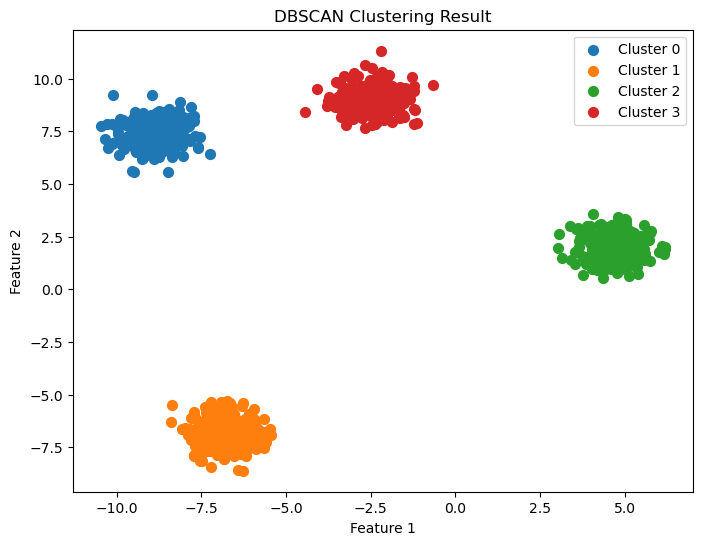

In [8]:
plt.figure(figsize=(8,6))

for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(
            X[labels == label, 0],
            X[labels == label, 1],
            c='black',
            marker='x',
            s=30,
            label='Noise'
        )
    else:
        plt.scatter(
            X[labels == label, 0],
            X[labels == label, 1],
            s=50,
            label=f'Cluster {label}'
        )

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
